2025-09-26 11:10:09.358232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758885009.552282      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758885009.609672      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


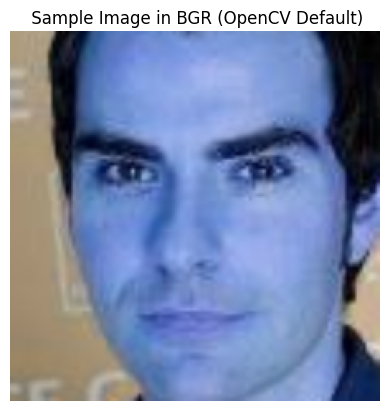

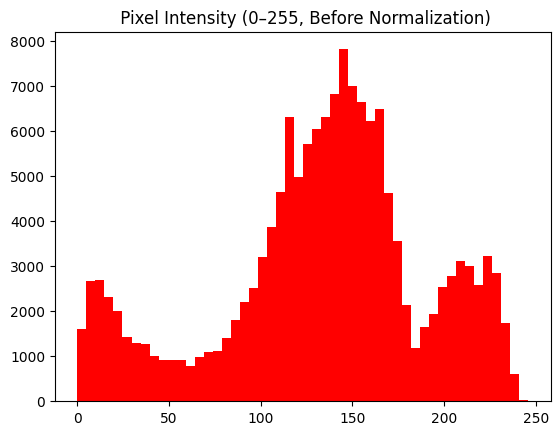

Processing WithMask: 100%|██████████| 1068/1068 [00:08<00:00, 124.42it/s]


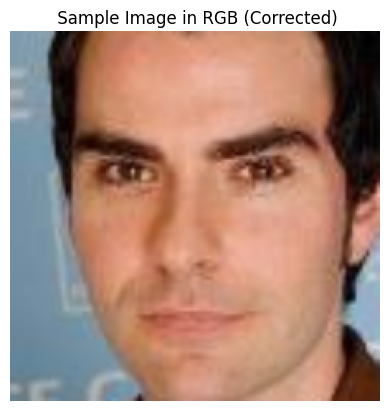

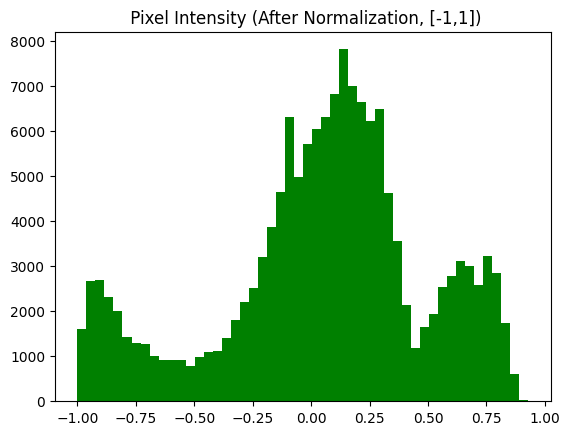

In [1]:
#Import Necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import zipfile
import random
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


resized_path = "/kaggle/input/resizeddataset"
final_path = "/kaggle/working/RGB&NormalizeDataset"
os.makedirs(final_path, exist_ok=True)

#Pick a random sample image for visualization
sample_category = random.choice(os.listdir(resized_path))
sample_folder = os.path.join(resized_path, sample_category)
sample_file = random.choice(os.listdir(sample_folder))
sample_path = os.path.join(sample_folder, sample_file)

bgr_img = cv2.imread(sample_path)

#Visualize the sample image before processing 
plt.imshow(bgr_img)
plt.title(" Sample Image in BGR (OpenCV Default)")
plt.axis("off")
plt.show()

# Plot pixel intensity distribution before normalization
plt.hist(bgr_img.ravel(), bins=50, color='red')
plt.title(" Pixel Intensity (0–255, Before Normalization)")
plt.show()

#Process all images in dataset
for category in os.listdir(resized_path):
    src_folder = os.path.join(resized_path, category)
    dst_folder = os.path.join(final_path, category)
    os.makedirs(dst_folder, exist_ok=True)

    for file in tqdm(os.listdir(src_folder), desc=f"Processing {category}"):
        file_path = os.path.join(src_folder, file)
        img = cv2.imread(file_path)

        if img is not None:
              # Convert from BGR to RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            
            img_norm = preprocess_input(img_rgb.astype(np.float32))

       
            np.save(os.path.join(dst_folder, file.replace(".jpg", ".npy")), img_norm)

#Visualize sample image after RGB conversion & normalization
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
norm_img = preprocess_input(rgb_img.astype(np.float32))

plt.imshow(rgb_img)
plt.title(" Sample Image in RGB (Corrected)")
plt.axis("off")
plt.show()

# Show histogram after normalization
plt.hist(norm_img.ravel(), bins=50, color='green')
plt.title(" Pixel Intensity (After Normalization, [-1,1])")
plt.show()


In [2]:
zip_path = "/kaggle/working/RGB&NormalizeDataset.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(final_path):
        for file in files:
            abs_path = os.path.join(root, file)
            rel_path = os.path.relpath(abs_path, final_path)
            zipf.write(abs_path, rel_path)

print(f"\n Final preprocessed dataset (BGR→RGB + Normalized) saved at: {zip_path}")


 Final preprocessed dataset (BGR→RGB + Normalized) saved at: /kaggle/working/RGB&NormalizeDataset.zip
